# Ford GoBike System Data Time Series and Users Analysis(Feb,2019)
## by ONWUEPE EMEKA

## Investigation Overview

This presentation is interested in showing the bike demands; when and from who the major demands are coming from? Trying to answer the question,when, will push us to time series analysis.


## Dataset Overview
Our dataset consists on 183213 sample trips with 14 features (duration_hr, start_time, end_time, start_station_id, start_station_name, end_station_id, end_station_name, bike_id, user_type, member_age, member_gender, bike_share_for_all_trip, distance_km, age_group). 

This is the cleaned version of 201902-fordgobike-tripdata.csv which originally contained 183412 sample trips with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip)

We cleaned missing values in start_station_id start_station_name end_station_id end_station_name, member_birth_year and member_gender features, corrected a wrong member_birth_yaer entry, converted start_time, end_time, bike_id, start_station_id, end_station_id and member_birth_year to their appropriate datatypes. We also calculated distance from start_station_latitude, start_station_longitude,end_station_latitude and end_station_longitude features and dropped them. We converted duration_sec to duration_hr, member_birth_year to age and created age_group from age.

In [1]:
# let's import the necessary packages
import datetime
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Load the dataset
df = pd.read_csv('cleaned_201902-fordgobike-tripdata.csv',parse_dates= ['start_time','end_time'])

In [3]:
df.head()

,duration_hr,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_age,member_gender,bike_share_for_all_trip,distance_km,age_group
0,14.495833,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,35,Male,No,0.544709,Energetic(18-39)
1,11.811389,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,81,Berry St at 4th St,2535,Customer,0,not specified,No,1.742999,unidentified
2,17.181667,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,47,Male,No,2.704545,Ageing(40-60)
3,10.136111,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,30,Other,No,0.260739,Energetic(18-39)
4,0.440278,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,45,Male,Yes,2.409301,Ageing(40-60)


In [4]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183214 entries, 0 to 183213
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_hr              183214 non-null  float64       
 1   start_time               183214 non-null  datetime64[ns]
 2   end_time                 183214 non-null  datetime64[ns]
 3   start_station_id         183214 non-null  int64         
 4   start_station_name       183214 non-null  object        
 5   end_station_id           183214 non-null  int64         
 6   end_station_name         183214 non-null  object        
 7   bike_id                  183214 non-null  int64         
 8   user_type                183214 non-null  object        
 9   member_age               183214 non-null  int64         
 10  member_gender            183214 non-null  object        
 11  bike_share_for_all_trip  183214 non-null  object        
 12  distance_km     

In [5]:

df.describe();

In [6]:
# let's prepare the data for time series analysis
data_count = df.groupby(df.start_time.dt.dayofweek)['distance_km'].count()
distance_df = df.groupby(df.start_time.dt.hour)['distance_km'].sum()

In [7]:
def get_percentage(series):
    '''Takes in a series/list and returns the percentage
        of each element to the summation of the list/series elements'''
    
    return round((series/np.sum(series)) * 100,2)

def plot_graph(df,graph_type, title ,xlabel, ylabel, ylim):
    '''Takes in a datafrme and plots either bar or pie chart

        Paramenters
        df: Dataframe
        graph_type: str
        title: str
        xlabel: str
        ylabel: str
        ylim: boolean
    
    '''
    
    if graph_type == "bar":
        df.plot.bar(rot=0,width=0.8,edgecolor="black",color=[sns.color_palette()[0],'orange','green','yellow','gold'])
    elif graph_type == 'pie':
        df.plot.pie(subplots=True) 
        
    if ylim and graph_type != "pie" :
        plt.ylim(0,100)
        
    # Add title and format it
    plt.title(title.title(),
               fontsize = 14, weight = "bold")
    # Add x label and format it
    plt.xlabel(xlabel.title(),fontsize = 10, weight = "bold")
    # Add y label and format it
    plt.ylabel(ylabel.title(),
               fontsize = 10, weight = "bold")
    

def feature_uniques_percentage(feature_name,graph="bar",ylim= True,
                               cal_percentage = get_percentage,graph_fun = plot_graph,df=df):
    '''Takes in string feature_name and other optional arguments 
        and plots either bar or pie chart of the feature unique
        values percentages

        Paramenters
        feature_name: str
        graph: str -- optional -- default: bar
        ylim: boolean -- optional -- default: True
        cal_percentage: function -- optional -- default: global scope get_percentage function
        graph_fun: function -- optional -- default: global scope plot_graph function
        df: dataframe -- optional -- default: global scope df
    '''
    #  get the counts of the feature unique values
    feature_df = df[feature_name].value_counts().to_frame()
    
    #  prints feature counts
    index = feature_df.index
    print(f"{feature_name} Counts --- ",end=" ")
    for name in index:
        print(f'{name} : { feature_df.loc[name][feature_name]};',end=" ")
        
    #  changes unique values counts to percentage
    #  using the passed in percentage function: cal_percentage
    feature_df[feature_name] = cal_percentage(feature_df[feature_name])
    
    #  print out feature percentages
    print()
    print(f"{feature_name} percentage --- ",end=" ")
    for name in index:
        print(f'{name} : { feature_df.loc[name][feature_name]}%;',end=" ")
    

    title = f"unique values percentages of {feature_name} feature " 
    #   call the graph function
    graph_fun(feature_df,graph,title,feature_name,'Percentage',ylim)

## Riders Gender Distribution
Ford GoBike demand within the month of feb,2019 was male dominated and it is interesting to note that 4.15% of the general demand could not be attributed to either male, female or other gender. The 4.15% represents those that their member_gender column were not filled

member_gender Counts ---  Male : 130500; Female : 40804; not specified : 8263; Other : 3647; 
member_gender percentage ---  Male : 71.23%; Female : 22.27%; not specified : 4.51%; Other : 1.99%; 

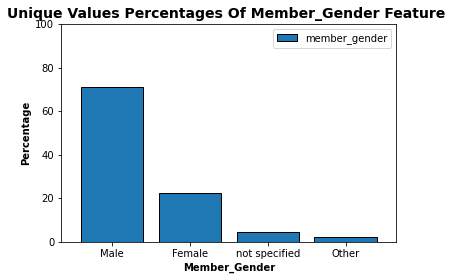

In [8]:
feature_uniques_percentage('member_gender')

## Riders User_type Distribution
It obvious that Ford GoBike had more demand from subscribers than customers in feb,2019

user_type Counts ---  Subscriber : 163413; Customer : 19801; 
user_type percentage ---  Subscriber : 89.19%; Customer : 10.81%; 

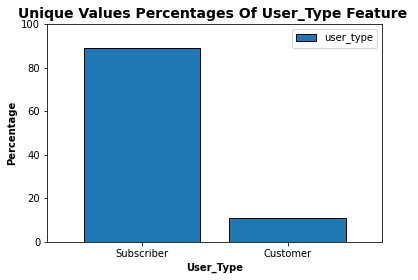

In [9]:
feature_uniques_percentage('user_type')

## Riders Age Group Distribution
Approximately 2% of our demands came from people above 60years and 94% from people below 60years with the higest percentage coming from those between the age of 18-39. The age group of about 5% of total demand is unknown, they represents those that their member_birth_year were not filled.

age_group Counts ---  Energetic(18-39) : 134318; Ageing(40-60) : 37104; unidentified : 8263; Above 60 : 3529; 
age_group percentage ---  Energetic(18-39) : 73.31%; Ageing(40-60) : 20.25%; unidentified : 4.51%; Above 60 : 1.93%; 

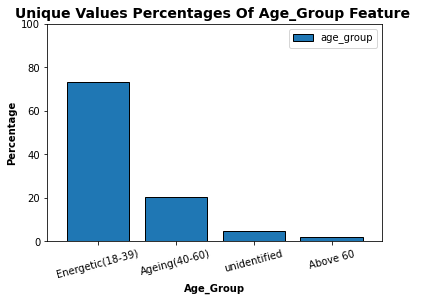

In [10]:
feature_uniques_percentage('age_group')
plt.xticks(rotation=15);

## Days with higest bike rides
More trips occured from Tuesday to Friday with Thursday as the highest while Monday, Saturday and Sunday had the lowest trips

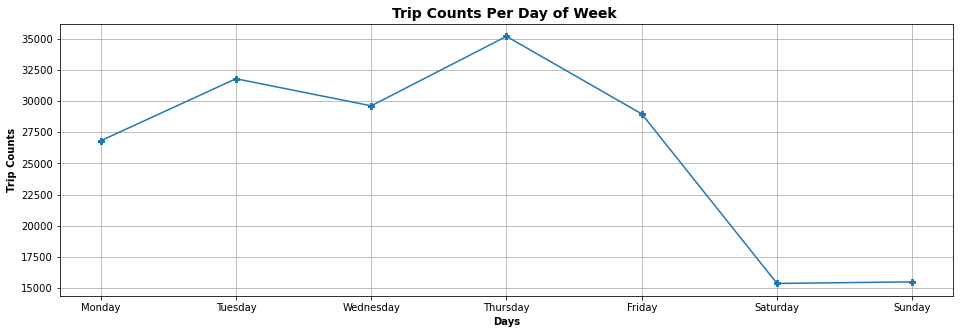

In [11]:
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize = [16, 5])
data_count.plot(marker="P");
plt.xticks([0,1,2,3,4,5,6,],labels=labels);
plt.title("Trip Counts Per Day of Week ",fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Days",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Trip Counts",
               fontsize = 10, weight = "bold");
plt.grid();

## The busiest time of the day
We can see a gradual raise in the graph as early as 4am reaching it's first peak by 8am. If we should place a line at 15000KM, we will see clearly the busiest hours are 7am - 9am and 4pm - 7pm. Bearing in mind that the majority of the users are within the age of 18-39 and 40-60 which could be called the working/business class, one could argue that the busiest hours are actually the time they should be going to work/ventures (7am - 9am) and when they should be returning home (4pm - 7pm)

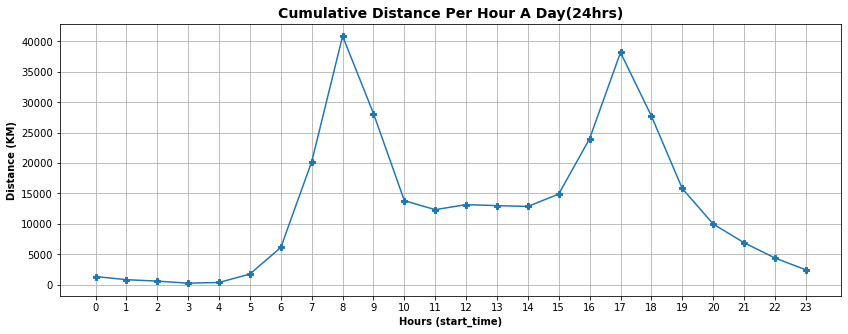

In [12]:
distance_df = distance_df.reset_index()
plt.figure(figsize = [14, 5])
distance_df.distance_km.plot(marker="P");
plt.xticks(distance_df.start_time)
plt.grid()
plt.title("Cumulative Distance Per Hour A Day(24hrs)",fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Hours (start_time)",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Distance (KM)",
               fontsize = 10, weight = "bold");

## Daily Distance Trend
The first Week, 4 - 10 (first Monday - Sunday) did better than the second week (11-17). We can argue that there was a drawback in the second week making the week 1 high the resistance level. The resistance was broken on the third week (18-24) making it the new resistance level till it got broken on Thursday 28 feb. Generally, our chart started making higher lows and relatively higher highs as from feb 9, which denotes an uptrend. Thus, the business made progress in the month of feb, 2019.

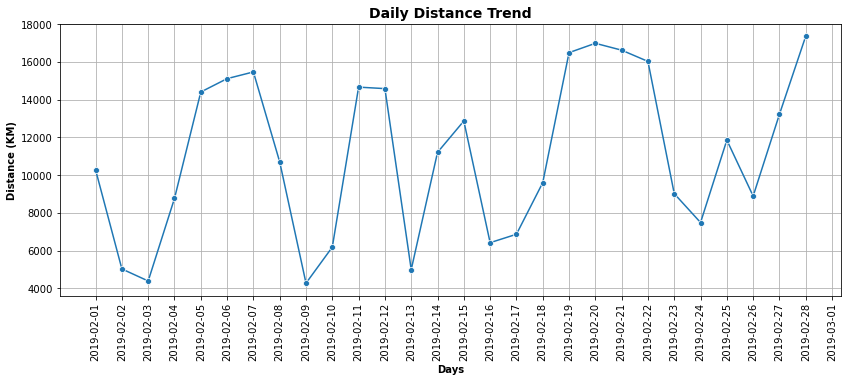

In [13]:
data =df.resample('1d', on="start_time",)['distance_km'].sum()
data = data.reset_index()
plt.figure(figsize = [14, 5])
sns.lineplot(data=data,x="start_time",y='distance_km',marker="o")


base = datetime.datetime(2019, 2, 1)
arr = np.array([base + datetime.timedelta(days=i) for i in range(29)])

plt.xticks(arr,rotation=90);
plt.grid()

plt.title("Daily Distance Trend",fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Days",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Distance (KM)",
               fontsize = 10, weight = "bold");